In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
# 1. Load the Data
data = pd.read_csv('/home/fymsc15/Aditya_WF/AIML/Assignment03/Position_Salaries.csv')
X = data.iloc[:, 1:2].values
y = data.iloc[:, 2].values

In [6]:
# 2. Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# 3. Create and Train the Polynomial Regression Model
degree = 4
poly_features = PolynomialFeatures(degree=degree)
X_poly_train = poly_features.fit_transform(X_train)

model = LinearRegression()
model.fit(X_poly_train, y_train)

X_poly_test = poly_features.transform(X_test)

In [8]:
# 4. Make Predictions
y_pred_train = model.predict(X_poly_train)
y_pred_test = model.predict(X_poly_test)

In [9]:
# 5. Evaluate the Model
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_pred_train)

mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test)

print("Training Metrics:")
print(f"MSE: {mse_train:.2f}")
print(f"RMSE: {rmse_train:.2f}")
print(f"R-squared: {r2_train:.2f}")

print("\nTesting Metrics:")
print(f"MSE: {mse_test:.2f}")
print(f"RMSE: {rmse_test:.2f}")
print(f"R-squared: {r2_test:.2f}")

Training Metrics:
MSE: 36443434.92
RMSE: 6036.84
R-squared: 1.00

Testing Metrics:
MSE: 1444499305.55
RMSE: 38006.57
R-squared: 0.97


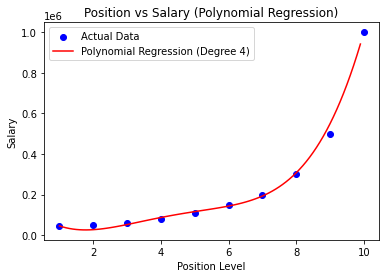

In [10]:
# 6. Visualize the Results
plt.scatter(X, y, color='blue', label='Actual Data')

X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape(len(X_grid), 1)
X_poly_grid = poly_features.transform(X_grid)
plt.plot(X_grid, model.predict(X_poly_grid), color='red', label=f'Polynomial Regression (Degree {degree})')

plt.title('Position vs Salary (Polynomial Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.legend()
plt.show()

In [11]:
# Example of making a prediction
position_to_predict = np.array([[6.5]])
position_poly = poly_features.transform(position_to_predict)
predicted_salary = model.predict(position_poly)

print(f"\nPredicted salary for position {position_to_predict[0][0]}: ${predicted_salary[0]:.2f}")


Predicted salary for position 6.5: $163313.59
